<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/MPLNS_20_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
#feature di input
#4 osservazioni con 3 feature booleane
X = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])

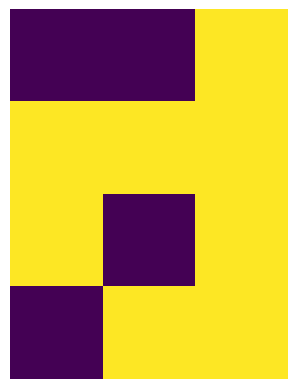

In [3]:
pl.imshow(X)
pl.axis('off');

In [4]:
#output 4 predizioni, 4x1
y = np.array([[0,1,1,0]]).T

In [5]:
#facciamo un single layer perceptron
#userò un layer di 3 neuroni (uno per feature)

#activation function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [14]:
def dsigmoid(x):
  return 1/(2+np.exp(x)+np.exp(-x))

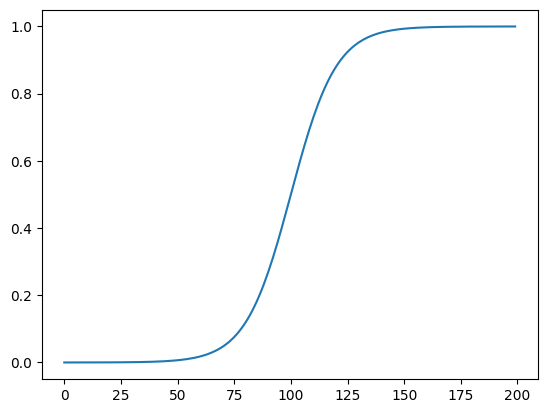

In [6]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))

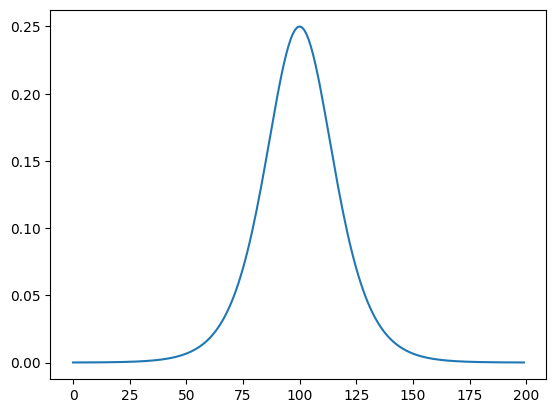

In [15]:
pl.plot(dsigmoid(np.arange(-10,10,0.1)))

In [7]:
#loss function
#la facciamo per ogni punto
def loss(prediction,target):
  return target-prediction #la cosa più semplice possibile

In [8]:
#devo dare una condizione iniziale, poi ottimizzerò i parametri col stocastich gradient descent
#(sarà stocastich solo nel senso che uso le sigmoidee)
np.random.seed(302)

In [9]:
#definiamo un criterio di convergenza che è solo numero di iterazioni
training = 6000

In [10]:
np.random.random?

In [12]:
#creaimo il nostro layer di neuroni
# input*layer=output
#4x3*3x1=4x1  ho bisogno di tre neuroni
syn0 = 2*np.random.random((3,1))-1  #uniforme da -1 a 1
syn0  #sono i pesi

array([[ 0.27256242],
       [ 0.65008468],
       [-0.31671053]])

In [17]:
#facciamo il training del layer di neuroni
for iter in range(training):
  #FORWARD-PROPAGATION
  input_layer = X
  #LINEAR REGRESSIONE
  l1 = np.dot(input_layer,syn0)
  #ACTIVATE FUNCTION
  output = sigmoid(l1)

  #calcoliamo la correzione ai pesi: in generale si parla di BACK-PROPAGATION
  output_error = loss(output,y) #anche questo è un 4x1
  output_delta = output_error*dsigmoid(output) #in questo modo chiaramente più l'errore è grande più modifico
                                               #ma inoltre modifico di più se sono in un'area più incerta (vicino 0)
  syn0 += np.dot(input_layer.T,output_delta) #alla fine faccio questo prodotto scalare che dà a tutti la stessa correzione

print("output after training",output)
print("target",y)

output after training [[1.20403073e-03]
 [9.98979903e-01]
 [9.99320193e-01]
 [8.02432473e-04]]
target [[0]
 [1]
 [1]
 [0]]
